# Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import scale 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
house_data = pd.read_csv('house_data_EDA.csv')

In [3]:
house_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


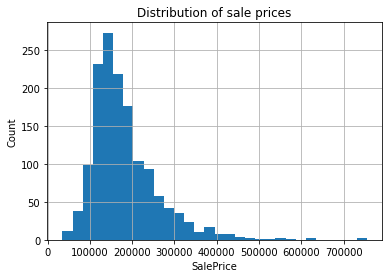

In [4]:
house_data.SalePrice.hist(bins=30)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Distribution of sale prices');

In [5]:
house_data.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
house_data.SalePrice_isna.value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice_isna, Length: 1460, dtype: bool>

In [7]:
y = house_data['SalePrice']

X = house_data.drop('SalePrice', axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Linear Regression

In [9]:
linear_model = LinearRegression()

In [10]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# As can be seen below, the linear model overfits the data in the train set

linear_model.score(X_train,y_train)

0.9407060283217248

In [12]:
# The score is pretty low when the model is applie top the test set

linear_model.score(X_test,y_test)

0.13915697192003418

In [13]:
# The standard error for train and test sets are computed below 

rmse = np.sqrt(mean_squared_error(y_train,linear_model.predict(X_train)))
print("Root Mean Squared Error: {}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test,linear_model.predict(X_test)))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 18805.90017233309
Root Mean Squared Error: 81258.51855993982


In [14]:
# We also check that the cross-validation score is very low 

cv_scores_5 = cross_val_score(linear_model,X,y,cv=5)

print(cv_scores_5)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_5)))

[0.22265829 0.82160148 0.78891663 0.88467709 0.66450577]
Average 5-Fold CV Score: 0.6764718527575286


## Lasso

In [15]:
# Next, we apply the Ridge model to our dataframe. First, we select the grid of alpha values

params_grid= {'alpha': 5*10**np.logspace(2,-2,200)}

In [16]:
# Perform GridSearchCV to find optimal value of alpha

lasso= Lasso(random_state= 42)
grid_lasso= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 5,
                        scoring= 'r2',
                        return_train_score= True,
                        verbose= 1)      
grid_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1347977507.982727, tolerance: 572016182.2224234
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 807624501.9211426, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1761294003.262085, tolerance: 572016182.2224234
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coor

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86129135974.00992, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161731492.0981445, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114262656105.38712, tolerance: 572016182.2224234
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171665310175.78778, tolerance: 572016182.2224234
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175896135579.70786, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9674305313.840454, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172432427337.59946, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144936636399.4184, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167364693573.4543, tolerance: 572016182.2224234
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170113792158.8297, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183755434351.2712, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162466462530.01147, tolerance: 572016182.2224234
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124436260294.76483, tolerance: 525605188.80204767
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168043607450.03406, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189679664233.0825, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138837069639.8349, tolerance: 525605188.80204767
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166050796923.46994, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191803073353.31787, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46451911304.800964, tolerance: 525605188.80204767
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164603587558.76126, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191699969851.39606, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72568016183.9506, tolerance: 525605188.80204767
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163656249206.66754, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191257487160.62955, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85897231785.30705, tolerance: 525605188.80204767
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162880207599.23773, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191007465793.71527, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91349516683.77475, tolerance: 525605188.80204767
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162405006234.30704, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14561794164.740631, tolerance: 579592113.9945964
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95336605402.86356, tolerance: 525605188.80204767
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162081569713.4307, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190579709398.053, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coor

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98521965402.94397, tolerance: 525605188.80204767
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161876244781.27826, tolerance: 571614666.2949618
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24188378683.775574, tolerance: 579592113.9945964
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37837461070.70593, tolerance: 579592113.9945964
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190344335345.859, tolerance: 537415025.1745834
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153940377742.52676, tolerance: 572016182.2224234
  model = cd_fast.enet_coordinate_descent(
/Users/KML/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coor

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': array([5.00000000e+100, 1.50013777e+096, 7.20863443e+091, 5.43104773e+087,
       6.28621887e+083, 1.09631830e+080, 2.82795564e+076, 1.06000758e+073,
       5.67682107e+069, 4.27417911e+066, 4.45512513e+063, 6.33487172e+060,
       1.21167595e+058, 3.07596791e+055, 1.02320602e+053, 4.40576332e+050,
       2.42709615e+048,...
       5.28523181e+000, 5.27198669e+000, 5.25937161e+000, 5.24735526e+000,
       5.23590801e+000, 5.22500181e+000, 5.21461007e+000, 5.20470763e+000,
       5.19527060e+000, 5.18627637e+000, 5.17770345e+000, 5.16953151e+000,
       5.16174120e+000, 5.15431419e+000, 5.14723307e+000, 5.14048129e+000,
       5.13404315e+000, 5.12790372e+000, 5.12204882e+000, 5.11646496e+000])},
             return_train_score=True, scoring='r2', verbose=1)

In [17]:
# Print the best estimation for alpha

grid_lasso.best_estimator_

Lasso(alpha=368.8787209631105, random_state=42)

In [18]:
# Print the best score

grid_lasso.best_score_

0.8038082809692184

In [19]:
cv_results = pd.DataFrame(grid_lasso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
85,0.029847,0.006826,0.005152,0.000672,452.23935,{'alpha': 452.23934959238204},0.809144,0.777026,0.618781,0.893938,...,0.798173,0.100716,3,0.859033,0.866620,0.886711,0.851907,0.849205,0.862695,0.013446
86,0.030779,0.006523,0.005592,0.001611,368.878721,{'alpha': 368.8787209631105},0.815677,0.785461,0.630947,0.893071,...,0.803808,0.096375,1,0.866372,0.873871,0.895190,0.859853,0.859383,0.870934,0.013221
87,0.032175,0.004601,0.005141,0.000420,303.669295,{'alpha': 303.6692950499845},0.820051,0.789011,0.635896,0.890952,...,0.802504,0.091173,2,0.871732,0.884482,0.903413,0.867318,0.874728,0.880335,0.012843
88,0.034262,0.002452,0.006008,0.002055,252.196571,{'alpha': 252.19657052712662},0.824065,0.789903,0.639614,0.888137,...,0.798028,0.085438,4,0.876780,0.892239,0.909138,0.880251,0.888766,0.889435,0.011323
89,0.031929,0.002686,0.005640,0.000883,211.215444,{'alpha': 211.21544414353718},0.827646,0.790034,0.641592,0.881233,...,0.791440,0.080583,5,0.881838,0.898010,0.913172,0.889846,0.898370,0.896247,0.010418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.166749,0.019754,0.005083,0.000133,5.140481,{'alpha': 5.140481289681232},0.863334,0.732280,0.699720,0.756416,...,0.722602,0.097568,122,0.935982,0.953861,0.940210,0.952032,0.940044,0.944426,0.007144
196,0.161456,0.015660,0.005085,0.000078,5.134043,{'alpha': 5.134043148582803},0.863331,0.732215,0.699741,0.756380,...,0.722588,0.097558,123,0.935985,0.953864,0.940211,0.952033,0.940047,0.944428,0.007143
197,0.161407,0.016580,0.005114,0.000107,5.127904,{'alpha': 5.127903718961786},0.863328,0.732153,0.699761,0.756342,...,0.722574,0.097548,124,0.935989,0.953867,0.940213,0.952033,0.940050,0.944431,0.007143
198,0.156927,0.018267,0.005160,0.000129,5.122049,{'alpha': 5.1220488171005565},0.863325,0.732093,0.699781,0.756301,...,0.722560,0.097538,125,0.935992,0.953870,0.940214,0.952033,0.940053,0.944433,0.007142


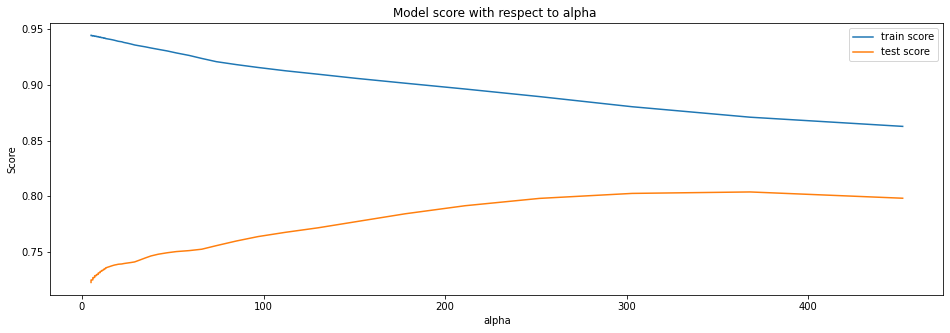

In [20]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title("Model score with respect to alpha ")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [21]:
# It seems like the score function seems to be a smooth function with respect to the alpha hyperparameter. 
# Let us get closer to the global max score by varying the alpha around the value that we found above


params_grid_max= {'alpha': np.linspace(350,380,200)}

grid_lasso_max= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid_max,
                        cv= 5,
                        scoring= 'r2',
                        return_train_score= True,
                        verbose= 1)      
grid_lasso_max.fit(X_train, y_train)

print(grid_lasso_max.best_estimator_)
print(grid_lasso_max.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Lasso(alpha=358.29145728643215, random_state=42)
0.803863618717268


In [22]:
# Last we print the values of standard error 

rmse = np.sqrt(mean_squared_error(y_train,grid_lasso_max.predict(X_train)))
print("Root Mean Squared Error: {}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test,grid_lasso_max.predict(X_test)))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 28493.64424798187
Root Mean Squared Error: 31669.2434490048


## Ridge

In [23]:
# Next, we apply the Ridge model to our dataframe. First, we select the grid of alpha values

params_grid= {'alpha': 4*5**np.logspace(2,-2,100)}

In [24]:
# Perform GridSearchCV to find optimal value of alpha

ridge= Ridge(random_state= 42)
grid_ridge= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid,
                        cv= 5,
                        scoring= 'r2',
                        return_train_score= True,
                        verbose= 1)      
grid_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': array([3.15544362e+70, 1.94806548e+64, 4.28329229e+58, 2.99624640e+53,
       6.01659968e+48, 3.15800894e+44, 3.97826279e+40, 1.11279188e+37,
       6.43869699e+33, 7.22441866e+30, 1.48209914e+28, 5.26913727e+25,
       3.09155101e+23, 2.86324978e+21, 4.01953995e+19, 8.24291277e+17,
       2.38754092e+16, 9.47249015e+14, 5....
       4.39540411e+00, 4.35874958e+00, 4.32561754e+00, 4.29564820e+00,
       4.26852207e+00, 4.24395492e+00, 4.22169339e+00, 4.20151120e+00,
       4.18320595e+00, 4.16659635e+00, 4.15151972e+00, 4.13782996e+00,
       4.12539567e+00, 4.11409855e+00, 4.10383197e+00, 4.09449975e+00,
       4.08601506e+00, 4.07829944e+00, 4.07128194e+00, 4.06489837e+00])},
             return_train_score=True, scoring='r2', verbose=1)

In [25]:
# Print the best estimation for alpha

grid_ridge.best_estimator_

Ridge(alpha=11.53282176451345, random_state=42)

In [26]:
# Print the best score

grid_ridge.best_score_

0.8109664423400019

In [27]:
cv_results = pd.DataFrame(grid_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
43,0.017279,0.000159,0.005047,0.000112,76.153722,{'alpha': 76.15372213775619},0.813546,0.774176,0.619143,0.892927,...,0.799416,0.101645,57,0.863607,0.873146,0.896373,0.854380,0.853782,0.868258,0.015736
44,0.017092,0.000174,0.004978,0.000097,58.615467,{'alpha': 58.61546721719499},0.816721,0.777533,0.625413,0.892498,...,0.802250,0.099612,56,0.869307,0.878476,0.900178,0.860653,0.859520,0.873627,0.014930
45,0.017417,0.000380,0.004999,0.000200,46.177695,{'alpha': 46.177694642348854},0.819333,0.780149,0.630973,0.891648,...,0.804526,0.097715,55,0.874259,0.883120,0.903542,0.866153,0.864521,0.878319,0.014242
46,0.017440,0.000295,0.005099,0.000288,37.158145,{'alpha': 37.158144933965566},0.821452,0.782151,0.635860,0.890484,...,0.806325,0.095965,54,0.878533,0.887142,0.906501,0.870951,0.868866,0.882399,0.013657
47,0.017602,0.000400,0.004979,0.000115,30.483168,{'alpha': 30.483168194087035},0.823155,0.783654,0.640122,0.889098,...,0.807720,0.094367,53,0.882209,0.890617,0.909094,0.875126,0.872638,0.885937,0.013159
48,0.017218,0.000537,0.004946,0.000112,25.451046,{'alpha': 25.451046439053968},0.824517,0.784756,0.643814,0.887570,...,0.808778,0.092917,29,0.885366,0.893617,0.911360,0.878756,0.875915,0.889003,0.012733
49,0.017627,0.000380,0.004949,0.000155,21.59295,{'alpha': 21.592949974044902},0.825606,0.785544,0.646996,0.885966,...,0.809563,0.091610,19,0.888077,0.896213,0.913338,0.881914,0.878768,0.891662,0.012367
50,0.017296,0.000485,0.005195,0.000399,18.589201,{'alpha': 18.58920129397054},0.826480,0.786086,0.649728,0.884337,...,0.810127,0.090436,13,0.890410,0.898464,0.915065,0.884667,0.881259,0.893973,0.012050
51,0.017238,0.000559,0.004914,0.000138,16.21767,{'alpha': 16.217669865086737},0.827185,0.786436,0.652067,0.882721,...,0.810515,0.089384,9,0.892423,0.900423,0.916574,0.887073,0.883441,0.895987,0.011773
52,0.017360,0.000272,0.005016,0.000205,14.321278,{'alpha': 14.321277703921314},0.827760,0.786638,0.654067,0.881148,...,0.810765,0.088443,6,0.894164,0.902136,0.917896,0.889182,0.885360,0.897748,0.011532


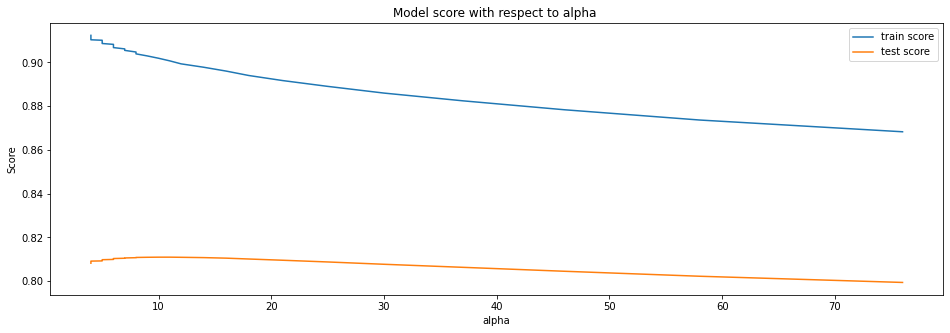

In [28]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title("Model score with respect to alpha ")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [29]:
# It seems like the score function seems to be a smooth function with respect to the alpha hyperparameter. 
# Let us get closer to the global max score by varying the alpha around the value that we found above


params_grid_max= {'alpha': np.linspace(10.5,12.0,200)}

grid_ridge_max= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid_max,
                        cv= 5,
                        scoring= 'r2',
                        return_train_score= True,
                        verbose= 1)      
grid_ridge_max.fit(X_train, y_train)

print(grid_ridge_max.best_estimator_)
print(grid_ridge_max.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Ridge(alpha=11.050251256281406, random_state=42)
0.8109719476264365


In [30]:
# Last we print the values of standard error 

rmse = np.sqrt(mean_squared_error(y_train,grid_ridge_max.predict(X_train)))
print("Root Mean Squared Error: {}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test,grid_ridge_max.predict(X_test)))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 24989.5643275489
Root Mean Squared Error: 30778.33909959441


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_pipe = make_pipeline(
    RandomForestRegressor(random_state=47)
)

In [75]:
# from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

RandomForest_cv_results = cross_validate(RandomForest_pipe, X_train, y_train, cv=5)

In [76]:
RandomForest_cv_scores = RandomForest_cv_results['test_score']
RandomForest_cv_scores

array([0.86644714, 0.76989342, 0.81038733, 0.88082563, 0.87552775])

In [77]:
np.mean(RandomForest_cv_scores), np.std(RandomForest_cv_scores)

(0.8406162536779729, 0.04340126316420154)

In [81]:
# Hyperparameter search using GridSearchCV

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [82]:
RandomForest_grid_cv = GridSearchCV(RandomForest_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [83]:
RandomForest_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000]})

In [84]:
RandomForest_grid_cv.best_params_

{'randomforestregressor__n_estimators': 112}

In [85]:
RandomForest_best_cv_results = cross_validate(RandomForest_grid_cv.best_estimator_, X_train, y_train, cv=5)
RandomForest_best_scores = RandomForest_best_cv_results['test_score']
RandomForest_best_scores

array([0.86850254, 0.77325839, 0.80840105, 0.88036394, 0.87576807])

In [86]:
np.mean(RandomForest_best_scores), np.std(RandomForest_best_scores)

(0.8412587989613494, 0.042815907639492654)

In [87]:
# Last we print the values of standard error 

rmse = np.sqrt(mean_squared_error(y_train,RandomForest_grid_cv.predict(X_train)))
print("Root Mean Squared Error: {}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test,RandomForest_grid_cv.predict(X_test)))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 11676.835396743787
Root Mean Squared Error: 29496.25289313527


In [ ]:
# We see that the Random Forest performs the best among all the models that we discussed in here